<a href="https://colab.research.google.com/github/iqbalsublime/OldPhotoRestorationAE/blob/main/Old_Photo_Restoration_Celeba_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Cropping2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
 !unzip damaged.zip

In [ ]:
!unzip input.zip

In [ ]:
#capture paths to images
output_images = glob.glob('damaged/*.jpg')

In [ ]:
#capture paths to images
input_images = glob.glob('input/*.jpg')

In [ ]:
print(len(output_images))

2500


In [ ]:
print(len(input_images))

2500


In [ ]:
damaged_images = []

for i in tqdm(output_images):
  img = image.load_img(i, target_size=(108,132,3))
  img = image.img_to_array(img)
  img = img/255.
  damaged_images.append(img)

100%|██████████| 2500/2500 [00:01<00:00, 1907.17it/s]


In [ ]:
colored_images = []

for i in tqdm(input_images):
  img = image.load_img(i, target_size=(108,132,3))
  img = image.img_to_array(img)
  img = img/255.
  colored_images.append(img)

100%|██████████| 2500/2500 [00:01<00:00, 1498.51it/s]


In [ ]:
damaged_images = np.array(damaged_images)

In [ ]:
colored_images = np.array(colored_images)

In [ ]:
print(colored_images.shape)

(2500, 108, 132, 3)


In [ ]:
# split data into train and validation data
train_y, val_y = train_test_split(damaged_images, random_state=32, test_size=0.1)

In [ ]:
# split data into train and validation data
train_x, val_x = train_test_split(colored_images, random_state=32, test_size=0.1)

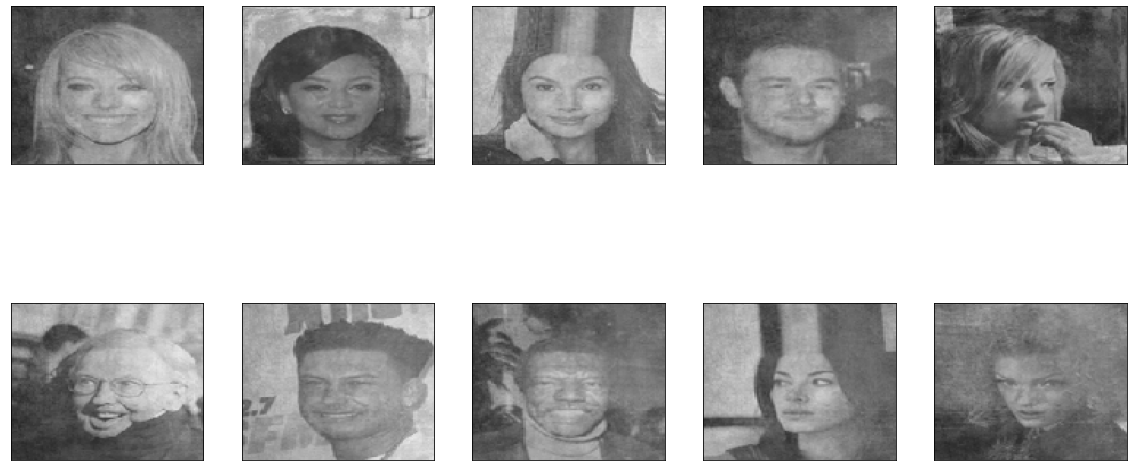

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(train_y[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(val_y[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

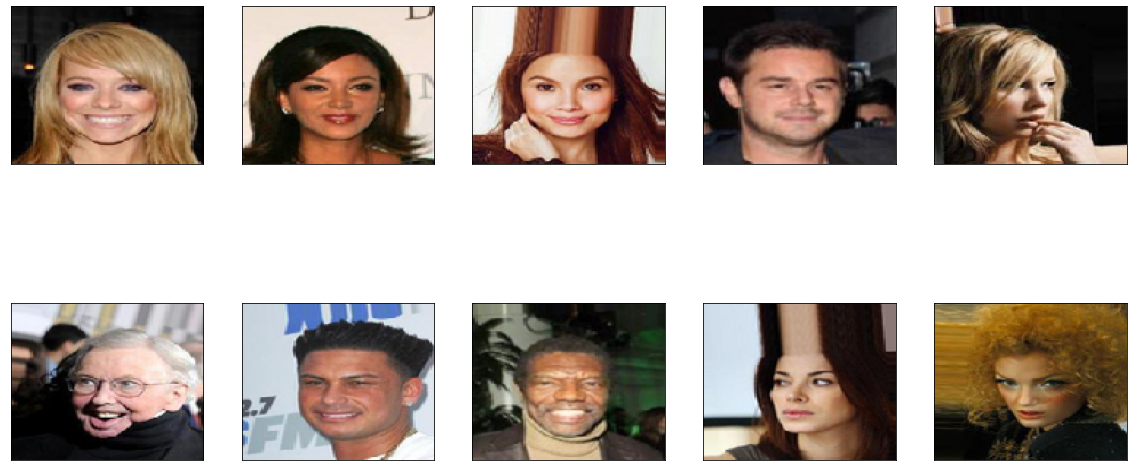

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(train_x[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(val_x[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
Input_img = Input(shape=(108, 132, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 108, 132, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 132, 256)     7168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 132, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 66, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 54, 66, 64)        73792     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 54, 66, 64)        36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 108, 132, 64)      0   

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_y, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_y, val_x),
            callbacks=[early_stopper])

Epoch 1/50
71/71 [==============================] - 40s 440ms/step - loss: 0.0551 - val_loss: 0.0218
Epoch 2/50
71/71 [==============================] - 23s 318ms/step - loss: 0.0193 - val_loss: 0.0218
Epoch 3/50
71/71 [==============================] - 22s 314ms/step - loss: 0.0177 - val_loss: 0.0173
Epoch 4/50
71/71 [==============================] - 22s 314ms/step - loss: 0.0168 - val_loss: 0.0195
Epoch 5/50
71/71 [==============================] - 22s 314ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 6/50
71/71 [==============================] - 22s 315ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 7/50
71/71 [==============================] - 23s 321ms/step - loss: 0.0149 - val_loss: 0.0152
Epoch 8/50
71/71 [==============================] - 22s 314ms/step - loss: 0.0149 - val_loss: 0.0174
Epoch 9/50
71/71 [==============================] - 22s 314ms/step - loss: 0.0143 - val_loss: 0.0150
Epoch 10/50
71/71 [==============================] - 22s 313ms/step - loss: 0.0142 - val_lo

In [ ]:
predictions = autoencoder.predict(val_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


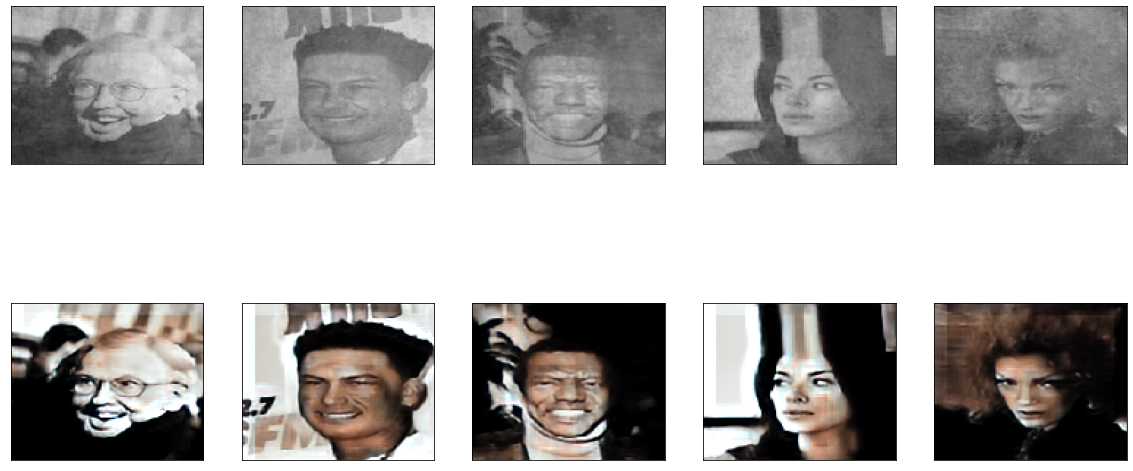

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_y[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()